# Assignment #4 - Reinforcement Learning

<font color="blue"> Apnav Poptani </font>

# I. Overview

In this assignment, we will implement a Reinforcement Learning algorithm on 2D Marble control and mountair car problem. We will understand and train an RL agent using SARSA or Q Learning. We will select one of the models for the experiment, then use the various parameters on the selected model and choose the best parameters for the final training of the RL agent. Finally, we will visualize and explain the results. We have implemented 2D marble control here, the game will be played by one player. The marble has to reach the goal with minium steps.

# II. Problems 



## 2D Marble Control

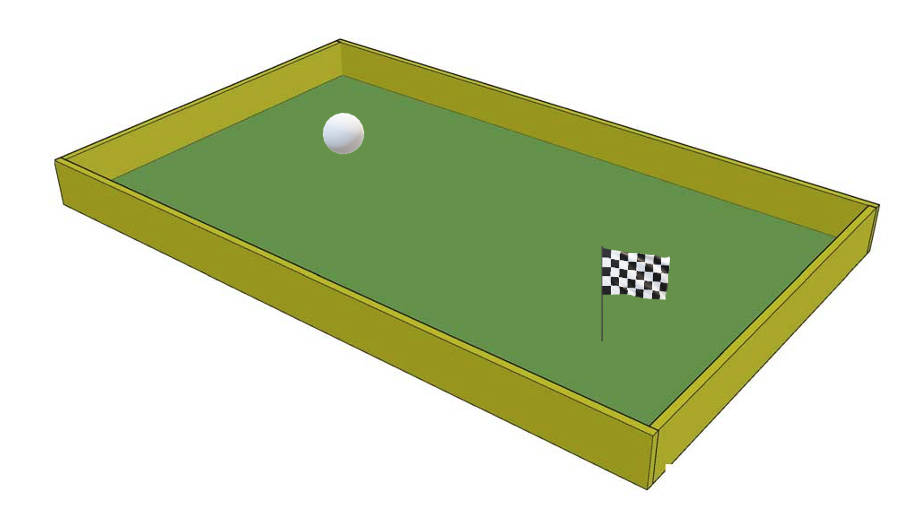

## Mountain Car


<img src="https://gym.openai.com/videos/2019-10-21--mqt8Qj1mwo/MountainCarContinuous-v0/poster.jpg" data-video-type="video/mp4" data-video-source="https://gym.openai.com/videos/2019-10-21--mqt8Qj1mwo/MountainCarContinuous-v0/original.mp4">



## Description

2D Marble Run is a one-player game where the player controls the marble and directs it to the goal with the help of directions. Here we are using four directions the marble can move, mainly up, down, right, left.

For the game, there can be different start points and different endpoints which can be declared at the start of the game.

The player who reaches the goal with the least number of steps wins the game.

## Game Environment

### State:
We create a 2D array of space for the marble to move in x,y coordinates

### Action:
We define a list of actions on how the marble can move, like for up, down, left, and right to create. list of the array of available actions at the instance.

### Goal: 
The Goal is defined as a [x,y] instance when the map is read by the Marble class.

### Reward: 
The rewards are given to each action step marble takes, If the marble reaches the goal, it is rewarded 100 points, if it moves one step near to the goal, it gets 1 points, and for each empty step, the reward is 0 points.

## Class Implementation :  2D Marble class

### Importing Libraries

In [469]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd  # for display and clear_output
import collections
from copy import deepcopy as copy
import matplotlib.patches as patches

from util import Standardizer

In [470]:
class Marble2d():
    """ 2d marble problem
        
        states: x,y,dx,dy
        action: action range [-1,1]

    """

    def __init__(self,goal=[5,5], **params):
        # len(state) + action (1)
        self.n_state = 2
        self.n_action = 1
        self.Goal = np.array(goal)
        self.bound = params.pop('bound', [0, 10, -5,5])
        if len(self.bound) != 4:
             self.bound = self.bound[:2] + [-5, 5]

        self._st_range = np.array([self.bound[:2], self.bound[2:], [-1, 1]]).T
        self._st_range_real = np.array([self.bound[:2],self.bound[:2],self.bound[2:], self.bound[2:],[-1, 1],[-1, 1]]).T
        self.nnNI = self.n_state + 1
        self.goal_width = 2
        
        self._s = [0,0,0,0]

    def init(self, start=None):
        if start is not None:
            self._s = start
        else: 
            self._s = [np.random.randint(self.bound[0], self.bound[1]),
                       np.random.randint(self.bound[0], self.bound[1]),
                       0.,
                      0.]
        return self._s
       

    def next(self, a) :
        s = self._s
        s1 = copy(s)
        dT = 0.1
        s1[0] += dT * s[2]  
        s1[1] += dT * s[3] 
        
        s1[2] += dT * ( 2*a[0] - 0.2 * s[2] )
        s1[3] += dT * ( 2*a[1] - 0.2 * s[3])    

        #adjust velocity when outside of the track
        
        eud = np.sqrt(np.sum((np.array(s1[:2]) - self.Goal)**2))
        if eud < 0.5:
            s1[2] = s1[2]-0.01
            s1[3] = s1[3]-0.01

        if s1[0] < self.bound[0]:
            s1[:]  = [self.bound[0],s1[1], -s1[2] , s1[3] ]
        elif s1[0] > self.bound[1] :
            s1[:] = [self.bound[1],s1[1], -s1[2] , s1[3]]
        
        if s1[1] < self.bound[0]:
            s1[:]  = [s1[0],self.bound[0], s1[2] , -s1[3]]
        elif s1[1] > self.bound[1] :
            s1[:] = [s1[0],self.bound[1], s1[2] , -s1[3]]
      
            
        #clipping the velocity
#         s1[2] = np.clip(s1[2], self._st_range[0, 1],
#                                self._st_range[1, 1])
        
#         s1[3] = np.clip(s1[3], self._st_range[0, 1],
#                                self._st_range[1, 1])
        
        self._s =  s1
        return self.get_reward(s, s1, a)

    def get_cur_state(self):
        return self._s

    def get_reward(self,s,s1,a):
        eud_prev = np.sqrt(np.sum((np.array(s[:2]) - self.Goal)**2))
        eud_now = np.sqrt(np.sum((np.array(s1[:2]) - self.Goal)**2))
        if eud_now==0:
            return 100
        elif eud_now < eud_prev:
            return 1
        else:
            return 0
#         return 1 if eud_now < eud_prev else 0 

    def get_state_range(self):
        return self._st_range
    
    def get_state_range_real(self):
        return self._st_range_real
    
    def get_actions(self):
        return np.array([[0,0] , [0,1] , [0,-1] , [1,0] , [-1,0]])

    def draw_trajectory(self, smplX):
        if smplX.shape[1] == 1: return
        plt.plot(smplX[:,0],smplX[:,1])
        plt.axis([self.bound[0], self.bound[1],-5,5])
        plt.plot(smplX[0,0],smplX[0,1],'go')
        plt.plot([5], [5], marker='o', markersize=3, color="red")
        rect = patches.Circle((5,5),env.goal_width-1,linewidth=1,edgecolor='r',facecolor='none')
        plt.gca().add_patch(rect)
        plt.xlabel("s") 
        plt.ylabel("s dot")
        plt.xlim([0, 10])
        plt.ylim([0, 10])

## Marble Class explanation:

Here I have created a marble class that can make the marble move in four directions(left, right, up, and down).


The __init method is a constructor that initializes the x and y bounds to the map, size of the map, goal position, and actions that the marble can do, goal width and start position.

The <b>init</b> method initializes the start point, If the user initializes with a starting point then the game takes that as a start point, or else the default start point is [random(x),random(y),0,0].

The <b>get_cur_state</b> method is used to get the current state of pointer/ marble at the instance.

The <b>get_reward</b> method is used to assign reward on steps that will train the model to reach goal.

The <b>get_state_range</b> method checks the range in which the current step can move.

The <b>get_state_range_real</b> method is used to define real x and y bounds for the current state to find avalilable steps.


The <b>next</b> is a crucial method as it defined the next step the marble can take based on available steps. Here the model class will inclrease velocity with each move and check if it has reached the goal.
The ball will bounce if it touches the walls and if the velocity is clipped if it goes below -5 or exceeds 5.


The <b>get_actions</b> method reads all the avalible actions at the instance.

If the marble reaches the goal, it is rewarded 100 points, if it moves one step near to the goal, it gets 1 points, and for each empty step, the reward is 0 points.

### Example Run with Random moves:

the following code shows how to create an environment. This only includes random actions for the marble run.

In [603]:
env = Marble2d()
start_pos=[1,1]
env.init([*start_pos, 0,0])
trace = np.array([*start_pos, 0,0])

def random():
    return np.random.randint(0,4)

for j in range(10):
    s = env.get_cur_state()
    idx=random()
    a = env.get_actions()[idx]
    trace = np.vstack((trace, s))
    for step in range(10):
        r1=env.next(a)
        s1=env.get_cur_state()
        idx=random()
        a1=env.get_actions()[idx]
        trace = np.vstack((trace, s1))
        s=s1

Here we give free run to marble with 1, 1 as starting point, 0, 0 as x and y velocities. The path can be seen in the next figure.

### Drawing the path:

The following method will trace a path from start to end of the marble movement.

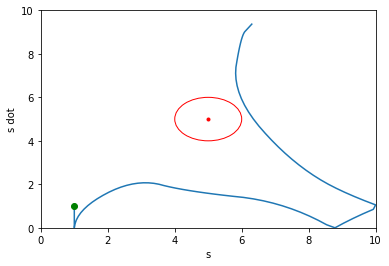

In [604]:
env.draw_trajectory(trace)

## Explnation of Marble run problem

The main aim of the game is to make the marble reach the goal with minimum steps. For this we need to create a RL agent which will predict next step on the basis on the current step with the help of Q leaning value. This will help the marble to reach goal with minimum steps.

## Explanation of Mountian car problem

The mountain car problem is straightforward. One needs to create a machine learning model( reinforcement) agent to learn on two variables: position and velocity. For any given state (position and velocity) of the car, the agent the possibility of driving back, driving forward, or not using the engine at all. In the standard version of the problem, the agent will receive a negative reward at every time step when the goal is not reached; the agent has no information about the goal until an initial success.

## Explanation of the codes to use MountainCarContinuous-v0 from OpenAI Gym

In [605]:
import gym
env1 = gym.make('MountainCar-v0')
env1.reset()
for _ in range(200):
    env1.render()
    env1.step(env1.action_space.sample()) # take a random action
env1.close()

Here we import the gym and then create an environment for mountain cars with MountainCar-v0, which initializes a demo environment. we then write a code to reset the environment in case any other gym environment is already running. we initialize a for loop to explain the sample actions of the dummy mountain car. The for loop runs for 500 random actions that the car can do and then it exists and at the end, we close the copy of the environment. 

In [136]:
print('Action Space: ',env1.action_space)

Action Space:  Discrete(3)


The Discrete space allows a fixed range of non-negative numbers, so in this case valid actions are either 0 or 1. 

In [137]:
print('state space: ', env1.observation_space)

state space:  Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)


The Box space represents an n-dimensional box, so valid observations will be an array of 4 numbers. We can also check the Box’s bounds:

In [133]:
print(env1.observation_space.low)

[-1.2  -0.07]


In [134]:
print(env1.observation_space.high)

[0.6  0.07]


The  box's limits are given in form of low: -1.2 to -0.07 and high: 0.6 to 0.7.

# III. Methods

## Review of SARSA and Q-Learning

Q-Learning is an off-policy, model-free RL algorithm based on the well-known Bellman Equation. The goal of Q-learning is to learn a policy, which tells an agent what action to take under what circumstances. It does not require a model (hence the connotation "model-free") of the environment, and it can handle problems with stochastic transitions and rewards, without requiring adaptations.
<br>
$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma \max_a Q(s_{t+1}, a) - Q(s_t, a_t)) 
$$
<br>
SARSA very much resembles Q-learning. The key difference between SARSA and Q-learning is that SARSA is an on-policy algorithm. It implies that SARSA learns the Q-value based on the action performed by the current policy instead of the greedy policy.
<br>
$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)) 
$$
<br>
By contrast, Q-learning has no constraint over the next action, as long as it maximizes the Q-value for the next state. Therefore, SARSA is an on-policy algorithm.

## TD learning approach: SARSA or Q-learning

For this problem I choose SARSA. As we want the agent to learn optimal greedy policy. Same in the case of the marble game I want the agent to learn by exploring.
SARSA will converge allowing for possible penalities from exploratory moves. It is very conservative and if there is any large negative closer to the optimal path it tends to avoid it.
We want the agent to learn optimal policies.

## Function Approximator
We have implemented the function approximator
<br>
$$
   Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)) 
$$
<br>

## RLAgent for 2D Marble run

Referencing the RLAgent in the lecture note, making our own agent class for the game. 

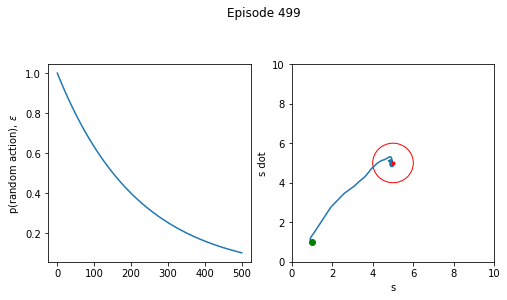

In [160]:
## Parameters`
K =500 
n_actions = 3 
max_steps = 300
gamma = 0.9
verbose = False

epsilon = 1
final_epsilon = 0.1
epsilon_decay =  np.exp(np.log(final_epsilon) / K)

####################
nHiddens = 20
nSamples = 1
nOutputs = 1
nInputs = 4 + 2  # size of state + action
max_iter = 10

rhoh = rhoo = 0.01

rh = rhoh / (nSamples*nOutputs)
ro = rhoo / (nSamples*nOutputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(0,1,size=(nInputs+1,nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(0,1,size=(1+nHiddens,nOutputs))-0.5)


# Add constant column of 1's
def addOnes(A):
    return np.insert(A, 0, 1, axis=len(np.array(A).shape)-1)


def forward(X):
    X = stdX.standardize(X)
    # Forward pass on training data
    X1 = addOnes(X)
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W
    return Y, Z

def as_array(A):
    A = np.array(A)
    if len(A.shape) == 1:
        return A.reshape((1, -1))
    return A

def backward(error, Z, X):
    
    ### make sure the array shapes
    X = as_array(X)
    Z = as_array(Z)
    E = as_array(error)
    
    Z1 = addOnes(Z)
    X1 = addOnes(X)

    # Backward pass - the backpropagation and weight update steps
    dV = rh * X1.T @ ( ( E @ W[1:,:].T) * (1-Z**2))
    dW = ro * Z1.T @ E
    return dV, dW


def epsilon_greedy(e, s):
    pos_a = env.get_actions()
    if np.random.rand() < e:
        return pos_a[np.random.choice(np.arange(len(pos_a)))]
    else:
        Q, _ = forward(np.hstack((np.tile(s, (5,1)), env.get_actions())))
        idx = np.where(Q == np.max(Q))
        max_as = env.get_actions()[idx[0]]
        max_as = max_as[np.random.choice(np.arange(max_as.shape[0]))]
        return max_as
        

fig = plt.figure(figsize=(8, 8))
####################
# Cart model environment 
env = Marble2d()

####################
# Normalize 
stdX = Standardizer(env.get_state_range_real())


# rewards and step trace
rtrace = []
etrace = [epsilon]
errors = []
dv_dq=[]
for j in range(K):

    if verbose: print("\tepisode #", j, "   ",end="")
        
    start_pos = [1,1]
    env.init([*start_pos, 0,0])
    s = env.get_cur_state()
    
    # selection an action
    a = epsilon_greedy(epsilon, s)

    rewards = []
    trace = np.array(s)
    for step in range(max_steps):
        if verbose: print("\tstep #", step, "   ",end="")
        # move
        r1 = env.next(a)
        s1 = env.get_cur_state()
        a1 = epsilon_greedy(epsilon, s1)

        rewards.append(r1)
        trace = np.vstack((trace, s1))
        
        # update neural networks
        Q1, _ = forward(np.hstack((s1, a1)))  # output of neural network is Q for next state
        Q, Z = forward(np.hstack((s, a)))  # output of neural network is Q for next state
        error = r1 + gamma * Q1 - Q  # use action value as index by adding one\
        errors.append(error[0])
        dV, dW = backward(error, Z, np.hstack((s, a)))
        V += dV
        W += dW
        
        dv_dq.append((np.linalg.norm(dV) , np.linalg.norm(dW)))
        s = s1
        a = a1
        eud_now = np.sqrt(np.sum((np.array(s1[:2]) - env.Goal)**2))
        if int(eud_now) <=env.goal_width-1.9:
            steps.append(step)
#             break
        
    epsilon *= epsilon_decay
    etrace.append(epsilon)
    
    if verbose: print("Done (", np.sum(rewards), ")", step)

    rtrace.append(np.sum(rewards))

    last_plot = (j == K-1)
    
    if j % 1 == 0 or last_plot:
        plt.clf()
        fig.add_subplot(221)
        plt.plot(etrace, "-")
        plt.ylabel("p(random action), $\epsilon$")
        fig.add_subplot(222)
        env.draw_trajectory(trace)
        plt.suptitle(''.join(["Episode ",str(j)]))
        plt.draw()

        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)

## Explanation of code

We have defined the train function here which gives us the environment to train our RL agent. This name simply reflects the fact that the main function of updating the Q-value depends on the current state of the agent. A SARSA agent interacts with the environment and updates the policy based on actions taken, hence this is known as an on-policy learning algorithm. The Q value for a state-action is updated by an error, adjusted by the learning rate alpha. Q values represent the possible reward received in the next time step for taking action an in state s, plus the discounted future reward received from the next state-action observation.

## RLAgent2 for the second problem (Mountain Car)

In [468]:
# Define Q-learning function
def RlAgent2(env1, learning, discount, epsilon, min_eps, episodes):
    # Determine size of discretized state space
    max_position = -.4
    steps=[]
    env1 = gym.make('MountainCar-v0')
    env1.reset()
    positions = np.ndarray([0,2])
    num_states = (env1.observation_space.high - env1.observation_space.low)*np.array([10, 100])

    num_states = np.round(num_states, 0).astype(int) + 1

    # Initialize Q table\n
    Q = np.random.uniform(low = -10, high = 20,size = (num_states[0], num_states[1],env1.action_space.n))

    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []

    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes

    # Run Q learning algorithm
    for i in range(episodes):

        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env1.reset()

        # Discretize state
        state_adj = (state - env1.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)

        for _ in range(200):

            # Determine next action - epsilon greedy strategy\n",
            if np.random.random() < epsilon:
                action = np.random.randint(0, env1.action_space.n)
            else:
                i_max = np.where(Q[state_adj[0], state_adj[1], :] == np.max(Q[state_adj[0], state_adj[1], :]))[0]
                action = int(np.random.choice(i_max))

            if state_adj[0] > max_position:
                max_position = state_adj[0]
                positions = np.append(positions, [[i, max_position]], axis=0)
                tot_reward += 100

            # Get next state and reward
            state2, reward, done, info = env1.step(action)

            # Discretize state2
            state2_adj = (state2 - env1.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)

            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                steps.append(_)
                # Adjust Q value for current state
            else:
                delta = learning*(reward + discount*np.max(Q[state2_adj[0], state2_adj[1]]) - Q[state_adj[0], state_adj[1],action]) 
                Q[state_adj[0], state_adj[1],action] += delta

            # Update variables
            tot_reward += reward 
            state_adj = state2_adj
              

        # Decay epsilon
        if epsilon > min_eps: 
            epsilon -= reduction

        # Track rewards
        reward_list.append(tot_reward)

        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list) 
            ave_reward_list.append(ave_reward) 
            reward_list = []

    env1.close()
    return ave_reward_list, positions

## Explanation of the RLAgent2 (mountain car)

The Reinforcement agent for the mountain car will take into consideration velocity and position while using the Sarsa agent. The agent will learn with each step when it gets positive rewards when reaching the goal and negative rewards on slipping back or not reaching the goal at all. The mountain car model has to decide between the following steps to move forward, backward, or to not use the engine at all. This will gradually update the rewards from high negative values to positive values and so we can plot a graph to check out the model is gaining better rewards i.e learning efficiently.

# IV - Results

## Reports the selected parameters 

### 2D Marble run:
I have used $\gamma$ gamma as 0.9, $\rho$ rho as 0.01 and $\epsilon$ eplision as heighest for 1 and it decays with each iteration and stops at 0.1.

For Neural network, I have used 20 neurons, 1 samples, 1 output layer and 6 inputs.

## Experimental outputs that show the choice of parameters:

## 1.  $\rho$ =0.05

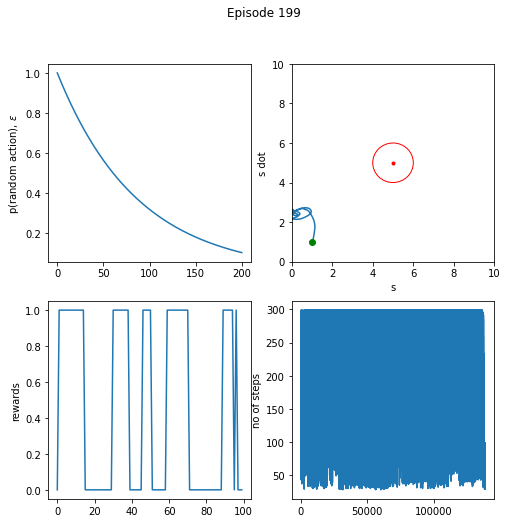

In [327]:
## Parameters`
K =200 
n_actions = 3 
max_steps = 100
gamma = 0.9
verbose = False

epsilon = 1
final_epsilon = 0.1
epsilon_decay =  np.exp(np.log(final_epsilon) / K)

####################
nHiddens = 20
nSamples = 1
nOutputs = 1
nInputs = 4 + 2  # size of state + action
max_iter = 10

rhoh = rhoo = 0.05

rh = rhoh / (nSamples*nOutputs)
ro = rhoo / (nSamples*nOutputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(0,1,size=(nInputs+1,nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(0,1,size=(1+nHiddens,nOutputs))-0.5)


# Add constant column of 1's
def addOnes(A):
    return np.insert(A, 0, 1, axis=len(np.array(A).shape)-1)


def forward(X):
    X = stdX.standardize(X)
    # Forward pass on training data
    X1 = addOnes(X)
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W
    return Y, Z

def as_array(A):
    A = np.array(A)
    if len(A.shape) == 1:
        return A.reshape((1, -1))
    return A

def backward(error, Z, X):
    
    ### make sure the array shapes
    X = as_array(X)
    Z = as_array(Z)
    E = as_array(error)
    
    Z1 = addOnes(Z)
    X1 = addOnes(X)

    # Backward pass - the backpropagation and weight update steps
    dV = rh * X1.T @ ( ( E @ W[1:,:].T) * (1-Z**2))
    dW = ro * Z1.T @ E
    return dV, dW


def epsilon_greedy(e, s):
    pos_a = env.get_actions()
    if np.random.rand() < e:
        return pos_a[np.random.choice(np.arange(len(pos_a)))]
    else:
        Q, _ = forward(np.hstack((np.tile(s, (5,1)), env.get_actions())))
        idx = np.where(Q == np.max(Q))
        max_as = env.get_actions()[idx[0]]
        max_as = max_as[np.random.choice(np.arange(max_as.shape[0]))]
        return max_as
        

fig = plt.figure(figsize=(8, 8))
####################
# Cart model environment 
env = Marble2d()

####################
# Normalize 
stdX = Standardizer(env.get_state_range_real())


# rewards and step trace
rtrace = []
etrace = [epsilon]
errors = []
dv_dq=[]
for j in range(K):

    if verbose: print("\tepisode #", j, "   ",end="")
        
#     start_pos = np.random.rand(1,2)[0]*10
    start_pos = [1,1]
    env.init([*start_pos, 0,0])
    s = env.get_cur_state()
    
    # selection an action
    a = epsilon_greedy(epsilon, s)

    rewards = []
    trace = np.array(s)
    for step in range(max_steps):
        if verbose: print("\tstep #", step, "   ",end="")
        # move
        r1 = env.next(a)
        s1 = env.get_cur_state()
        a1 = epsilon_greedy(epsilon, s1)

        rewards.append(r1)
        trace = np.vstack((trace, s1))
        
        # update neural networks
        Q1, _ = forward(np.hstack((s1, a1)))  # output of neural network is Q for next state
        Q, Z = forward(np.hstack((s, a)))  # output of neural network is Q for next state
        error = r1 + gamma * Q1 - Q  # use action value as index by adding one\
        errors.append(error[0])
        dV, dW = backward(error, Z, np.hstack((s, a)))
        V += dV
        W += dW
        
        dv_dq.append((np.linalg.norm(dV) , np.linalg.norm(dW)))
        s = s1
        a = a1
        eud_now = np.sqrt(np.sum((np.array(s1[:2]) - env.Goal)**2))
        if int(eud_now) <=env.goal_width-1.9:
            steps.append(step)
            break
        
    epsilon *= epsilon_decay
    etrace.append(epsilon)
    
    if verbose: print("Done (", np.sum(rewards), ")", step)

    rtrace.append(np.sum(rewards))

    last_plot = (j == K-1)
    
    if j % 10 == 0 or last_plot:
        plt.clf()
        fig.add_subplot(221)
        plt.plot(etrace, "-")
        plt.ylabel("p(random action), $\epsilon$")
        fig.add_subplot(222)
        env.draw_trajectory(trace)
        fig.add_subplot(223)
        plt.plot(rewards)
        plt.ylabel("rewards")
        fig.add_subplot(224)
        plt.plot(steps)
        plt.ylabel("no of steps")
        plt.suptitle(''.join(["Episode ",str(j)]))
        plt.draw()
        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)

## $\rho$ =0.01

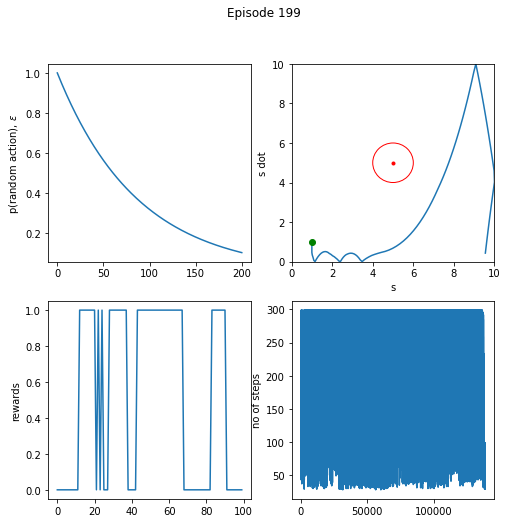

In [328]:
## Parameters`
K =200 
n_actions = 3 
max_steps = 100
gamma = 0.9
verbose = False

epsilon = 1
final_epsilon = 0.1
epsilon_decay =  np.exp(np.log(final_epsilon) / K)

####################
nHiddens = 20
nSamples = 1
nOutputs = 1
nInputs = 4 + 2  # size of state + action
max_iter = 10

rhoh = rhoo = 0.01

rh = rhoh / (nSamples*nOutputs)
ro = rhoo / (nSamples*nOutputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(0,1,size=(nInputs+1,nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(0,1,size=(1+nHiddens,nOutputs))-0.5)


# Add constant column of 1's
def addOnes(A):
    return np.insert(A, 0, 1, axis=len(np.array(A).shape)-1)


def forward(X):
    X = stdX.standardize(X)
    # Forward pass on training data
    X1 = addOnes(X)
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W
    return Y, Z

def as_array(A):
    A = np.array(A)
    if len(A.shape) == 1:
        return A.reshape((1, -1))
    return A

def backward(error, Z, X):
    
    ### make sure the array shapes
    X = as_array(X)
    Z = as_array(Z)
    E = as_array(error)
    
    Z1 = addOnes(Z)
    X1 = addOnes(X)

    # Backward pass - the backpropagation and weight update steps
    dV = rh * X1.T @ ( ( E @ W[1:,:].T) * (1-Z**2))
    dW = ro * Z1.T @ E
    return dV, dW


def epsilon_greedy(e, s):
    pos_a = env.get_actions()
    if np.random.rand() < e:
        return pos_a[np.random.choice(np.arange(len(pos_a)))]
    else:
        Q, _ = forward(np.hstack((np.tile(s, (5,1)), env.get_actions())))
        idx = np.where(Q == np.max(Q))
        max_as = env.get_actions()[idx[0]]
        max_as = max_as[np.random.choice(np.arange(max_as.shape[0]))]
        return max_as
        

fig = plt.figure(figsize=(8, 8))
####################
# Cart model environment 
env = Marble2d()

####################
# Normalize 
stdX = Standardizer(env.get_state_range_real())


# rewards and step trace
rtrace = []
etrace = [epsilon]
errors = []
dv_dq=[]
for j in range(K):

    if verbose: print("\tepisode #", j, "   ",end="")
        
#     start_pos = np.random.rand(1,2)[0]*10
    start_pos = [1,1]
    env.init([*start_pos, 0,0])
    s = env.get_cur_state()
    
    # selection an action
    a = epsilon_greedy(epsilon, s)

    rewards = []
    trace = np.array(s)
    for step in range(max_steps):
        if verbose: print("\tstep #", step, "   ",end="")
        # move
        r1 = env.next(a)
        s1 = env.get_cur_state()
        a1 = epsilon_greedy(epsilon, s1)

        rewards.append(r1)
        trace = np.vstack((trace, s1))
        
        # update neural networks
        Q1, _ = forward(np.hstack((s1, a1)))  # output of neural network is Q for next state
        Q, Z = forward(np.hstack((s, a)))  # output of neural network is Q for next state
        error = r1 + gamma * Q1 - Q  # use action value as index by adding one\
        errors.append(error[0])
        dV, dW = backward(error, Z, np.hstack((s, a)))
        V += dV
        W += dW
        
        dv_dq.append((np.linalg.norm(dV) , np.linalg.norm(dW)))
        s = s1
        a = a1
        eud_now = np.sqrt(np.sum((np.array(s1[:2]) - env.Goal)**2))
        if int(eud_now) <=env.goal_width-1.9:
            steps.append(step)
            break
        
    epsilon *= epsilon_decay
    etrace.append(epsilon)
    
    if verbose: print("Done (", np.sum(rewards), ")", step)

    rtrace.append(np.sum(rewards))

    last_plot = (j == K-1)
    
    if j % 10 == 0 or last_plot:
        plt.clf()
        fig.add_subplot(221)
        plt.plot(etrace, "-")
        plt.ylabel("p(random action), $\epsilon$")
        fig.add_subplot(222)
        env.draw_trajectory(trace)
        fig.add_subplot(223)
        plt.plot(rewards)
        plt.ylabel("rewards")
        fig.add_subplot(224)
        plt.plot(steps)
        plt.ylabel("no of steps")
        plt.suptitle(''.join(["Episode ",str(j)]))
        plt.draw()
        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)

## 2.  $\epsilon$=0.3

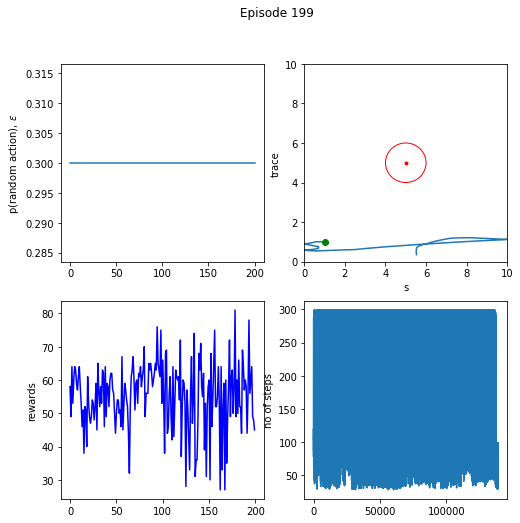

In [329]:
## Parameters`
K =200 
n_actions = 3 
max_steps = 100
gamma = 0.9
verbose = False

epsilon = 0.3

####################
nHiddens = 20
nSamples = 1
nOutputs = 1
nInputs = 4 + 2  # size of state + action
max_iter = 10

rhoh = rhoo = 0.01

rh = rhoh / (nSamples*nOutputs)
ro = rhoo / (nSamples*nOutputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(0,1,size=(nInputs+1,nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(0,1,size=(1+nHiddens,nOutputs))-0.5)


# Add constant column of 1's
def addOnes(A):
    return np.insert(A, 0, 1, axis=len(np.array(A).shape)-1)


def forward(X):
    X = stdX.standardize(X)
    # Forward pass on training data
    X1 = addOnes(X)
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W
    return Y, Z

def as_array(A):
    A = np.array(A)
    if len(A.shape) == 1:
        return A.reshape((1, -1))
    return A

def backward(error, Z, X):
    
    ### make sure the array shapes
    X = as_array(X)
    Z = as_array(Z)
    E = as_array(error)
    
    Z1 = addOnes(Z)
    X1 = addOnes(X)

    # Backward pass - the backpropagation and weight update steps
    dV = rh * X1.T @ ( ( E @ W[1:,:].T) * (1-Z**2))
    dW = ro * Z1.T @ E
    return dV, dW


def epsilon_greedy(e, s):
    pos_a = env.get_actions()
    if np.random.rand() < e:
        return pos_a[np.random.choice(np.arange(len(pos_a)))]
    else:
        Q, _ = forward(np.hstack((np.tile(s, (5,1)), env.get_actions())))
        idx = np.where(Q == np.max(Q))
        max_as = env.get_actions()[idx[0]]
        max_as = max_as[np.random.choice(np.arange(max_as.shape[0]))]
        return max_as
        

fig = plt.figure(figsize=(8, 8))
####################
# Cart model environment 
env = Marble2d()

####################
# Normalize 
stdX = Standardizer(env.get_state_range_real())


# rewards and step trace
rtrace = []
etrace = [epsilon]
errors = []
dv_dq=[]
for j in range(K):

    if verbose: print("\tepisode #", j, "   ",end="")
        
#     start_pos = np.random.rand(1,2)[0]*10
    start_pos = [1,1]
    env.init([*start_pos, 0,0])
    s = env.get_cur_state()
    
    # selection an action
    a = epsilon_greedy(epsilon, s)

    rewards = []
    trace = np.array(s)
    for step in range(max_steps):
        if verbose: print("\tstep #", step, "   ",end="")
        # move
        r1 = env.next(a)
        s1 = env.get_cur_state()
        a1 = epsilon_greedy(epsilon, s1)

        rewards.append(r1)
        trace = np.vstack((trace, s1))
        
        # update neural networks
        Q1, _ = forward(np.hstack((s1, a1)))  # output of neural network is Q for next state
        Q, Z = forward(np.hstack((s, a)))  # output of neural network is Q for next state
        error = r1 + gamma * Q1 - Q  # use action value as index by adding one\
        errors.append(error[0])
        dV, dW = backward(error, Z, np.hstack((s, a)))
        V += dV
        W += dW
        
        dv_dq.append((np.linalg.norm(dV) , np.linalg.norm(dW)))
        s = s1
        a = a1
        eud_now = np.sqrt(np.sum((np.array(s1[:2]) - env.Goal)**2))
        if int(eud_now) <=env.goal_width-1.9:
            steps.append(step)
            break
    
    etrace.append(epsilon)
    
    if verbose: print("Done (", np.sum(rewards), ")", step)

    rtrace.append(np.sum(rewards))

    last_plot = (j == K-1)
    
    if j % 10 == 0 or last_plot:
        plt.clf()
        fig.add_subplot(221)
        plt.plot(etrace, "-")
        plt.ylabel("p(random action), $\epsilon$")
        fig.add_subplot(222)
        env.draw_trajectory(trace)
        plt.ylabel("trace")
        fig.add_subplot(223)
        plt.plot(rtrace,"b-")
        plt.ylabel("rewards")
        fig.add_subplot(224)
        plt.plot(steps)
        plt.ylabel("no of steps")
        plt.suptitle(''.join(["Episode ",str(j)]))
        plt.draw()
        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)

## $\epsilon$=0.5

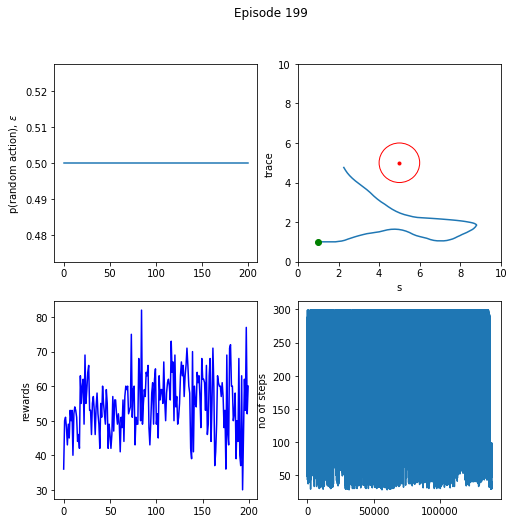

In [333]:
## Parameters`
K =200 
n_actions = 3 
max_steps = 100
gamma = 0.9
verbose = False

epsilon = 0.5

####################
nHiddens = 20
nSamples = 1
nOutputs = 1
nInputs = 4 + 2  # size of state + action
max_iter = 10

rhoh = rhoo = 0.01

rh = rhoh / (nSamples*nOutputs)
ro = rhoo / (nSamples*nOutputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(0,1,size=(nInputs+1,nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(0,1,size=(1+nHiddens,nOutputs))-0.5)


# Add constant column of 1's
def addOnes(A):
    return np.insert(A, 0, 1, axis=len(np.array(A).shape)-1)


def forward(X):
    X = stdX.standardize(X)
    # Forward pass on training data
    X1 = addOnes(X)
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W
    return Y, Z

def as_array(A):
    A = np.array(A)
    if len(A.shape) == 1:
        return A.reshape((1, -1))
    return A

def backward(error, Z, X):
    
    ### make sure the array shapes
    X = as_array(X)
    Z = as_array(Z)
    E = as_array(error)
    
    Z1 = addOnes(Z)
    X1 = addOnes(X)

    # Backward pass - the backpropagation and weight update steps
    dV = rh * X1.T @ ( ( E @ W[1:,:].T) * (1-Z**2))
    dW = ro * Z1.T @ E
    return dV, dW


def epsilon_greedy(e, s):
    pos_a = env.get_actions()
    if np.random.rand() < e:
        return pos_a[np.random.choice(np.arange(len(pos_a)))]
    else:
        Q, _ = forward(np.hstack((np.tile(s, (5,1)), env.get_actions())))
        idx = np.where(Q == np.max(Q))
        max_as = env.get_actions()[idx[0]]
        max_as = max_as[np.random.choice(np.arange(max_as.shape[0]))]
        return max_as
        

fig = plt.figure(figsize=(8, 8))
####################
# Cart model environment 
env = Marble2d()

####################
# Normalize 
stdX = Standardizer(env.get_state_range_real())


# rewards and step trace
rtrace = []
etrace = [epsilon]
errors = []
dv_dq=[]
for j in range(K):

    if verbose: print("\tepisode #", j, "   ",end="")
        
#     start_pos = np.random.rand(1,2)[0]*10
    start_pos = [1,1]
    env.init([*start_pos, 0,0])
    s = env.get_cur_state()
    
    # selection an action
    a = epsilon_greedy(epsilon, s)

    rewards = []
    trace = np.array(s)
    for step in range(max_steps):
        if verbose: print("\tstep #", step, "   ",end="")
        # move
        r1 = env.next(a)
        s1 = env.get_cur_state()
        a1 = epsilon_greedy(epsilon, s1)

        rewards.append(r1)
        trace = np.vstack((trace, s1))
        
        # update neural networks
        Q1, _ = forward(np.hstack((s1, a1)))  # output of neural network is Q for next state
        Q, Z = forward(np.hstack((s, a)))  # output of neural network is Q for next state
        error = r1 + gamma * Q1 - Q  # use action value as index by adding one\
        errors.append(error[0])
        dV, dW = backward(error, Z, np.hstack((s, a)))
        V += dV
        W += dW
        
        dv_dq.append((np.linalg.norm(dV) , np.linalg.norm(dW)))
        s = s1
        a = a1
        eud_now = np.sqrt(np.sum((np.array(s1[:2]) - env.Goal)**2))
        if int(eud_now) <=env.goal_width-1.9:
            steps.append(step)
            break
    
    etrace.append(epsilon)
    
    if verbose: print("Done (", np.sum(rewards), ")", step)

    rtrace.append(np.sum(rewards))

    last_plot = (j == K-1)
    
    if j % 10 == 0 or last_plot:
        plt.clf()
        fig.add_subplot(221)
        plt.plot(etrace, "-")
        plt.ylabel("p(random action), $\epsilon$")
        fig.add_subplot(222)
        env.draw_trajectory(trace)
        plt.ylabel("trace")
        fig.add_subplot(223)
        plt.plot(rtrace,"b-")
        plt.ylabel("rewards")
        fig.add_subplot(224)
        plt.plot(steps)
        plt.ylabel("no of steps")
        plt.suptitle(''.join(["Episode ",str(j)]))
        plt.draw()
        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)

## 3.  $\gamma$=0.92

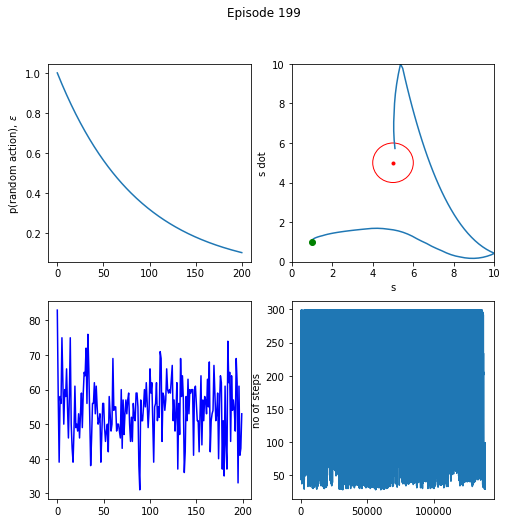

In [331]:
## Parameters`
K =200 
n_actions = 3 
max_steps = 100
gamma = 0.92
verbose = False

epsilon = 1
final_epsilon = 0.1
epsilon_decay =  np.exp(np.log(final_epsilon) / K)

####################
nHiddens = 20
nSamples = 1
nOutputs = 1
nInputs = 4 + 2  # size of state + action
max_iter = 10

rhoh = rhoo = 0.01

rh = rhoh / (nSamples*nOutputs)
ro = rhoo / (nSamples*nOutputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(0,1,size=(nInputs+1,nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(0,1,size=(1+nHiddens,nOutputs))-0.5)


# Add constant column of 1's
def addOnes(A):
    return np.insert(A, 0, 1, axis=len(np.array(A).shape)-1)


def forward(X):
    X = stdX.standardize(X)
    # Forward pass on training data
    X1 = addOnes(X)
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W
    return Y, Z

def as_array(A):
    A = np.array(A)
    if len(A.shape) == 1:
        return A.reshape((1, -1))
    return A

def backward(error, Z, X):
    
    ### make sure the array shapes
    X = as_array(X)
    Z = as_array(Z)
    E = as_array(error)
    
    Z1 = addOnes(Z)
    X1 = addOnes(X)

    # Backward pass - the backpropagation and weight update steps
    dV = rh * X1.T @ ( ( E @ W[1:,:].T) * (1-Z**2))
    dW = ro * Z1.T @ E
    return dV, dW


def epsilon_greedy(e, s):
    pos_a = env.get_actions()
    if np.random.rand() < e:
        return pos_a[np.random.choice(np.arange(len(pos_a)))]
    else:
        Q, _ = forward(np.hstack((np.tile(s, (5,1)), env.get_actions())))
        idx = np.where(Q == np.max(Q))
        max_as = env.get_actions()[idx[0]]
        max_as = max_as[np.random.choice(np.arange(max_as.shape[0]))]
        return max_as
        

fig = plt.figure(figsize=(8, 8))
####################
# Cart model environment 
env = Marble2d()

####################
# Normalize 
stdX = Standardizer(env.get_state_range_real())


# rewards and step trace
rtrace = []
etrace = [epsilon]
errors = []
dv_dq=[]
for j in range(K):

    if verbose: print("\tepisode #", j, "   ",end="")
        
#     start_pos = np.random.rand(1,2)[0]*10
    start_pos = [1,1]
    env.init([*start_pos, 0,0])
    s = env.get_cur_state()
    
    # selection an action
    a = epsilon_greedy(epsilon, s)

    rewards = []
    trace = np.array(s)
    for step in range(max_steps):
        if verbose: print("\tstep #", step, "   ",end="")
        # move
        r1 = env.next(a)
        s1 = env.get_cur_state()
        a1 = epsilon_greedy(epsilon, s1)

        rewards.append(r1)
        trace = np.vstack((trace, s1))
        
        # update neural networks
        Q1, _ = forward(np.hstack((s1, a1)))  # output of neural network is Q for next state
        Q, Z = forward(np.hstack((s, a)))  # output of neural network is Q for next state
        error = r1 + gamma * Q1 - Q  # use action value as index by adding one\
        errors.append(error[0])
        dV, dW = backward(error, Z, np.hstack((s, a)))
        V += dV
        W += dW
        
        dv_dq.append((np.linalg.norm(dV) , np.linalg.norm(dW)))
        s = s1
        a = a1
        eud_now = np.sqrt(np.sum((np.array(s1[:2]) - env.Goal)**2))
        if int(eud_now) <=env.goal_width-1.9:
            steps.append(step)
            break
        
    epsilon *= epsilon_decay
    etrace.append(epsilon)
    
    if verbose: print("Done (", np.sum(rewards), ")", step)

    rtrace.append(np.sum(rewards))

    last_plot = (j == K-1)
    
    if j % 10 == 0 or last_plot:
        plt.clf()
        fig.add_subplot(221)
        plt.plot(etrace, "-")
        plt.ylabel("p(random action), $\epsilon$")
        fig.add_subplot(222)
        env.draw_trajectory(trace)
        fig.add_subplot(223)
        plt.plot(rtrace,"b-")
        fig.add_subplot(224)
        plt.plot(steps)
        plt.ylabel("no of steps")
        plt.suptitle(''.join(["Episode ",str(j)]))
        plt.draw()
        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)

## $\gamma$=0.95

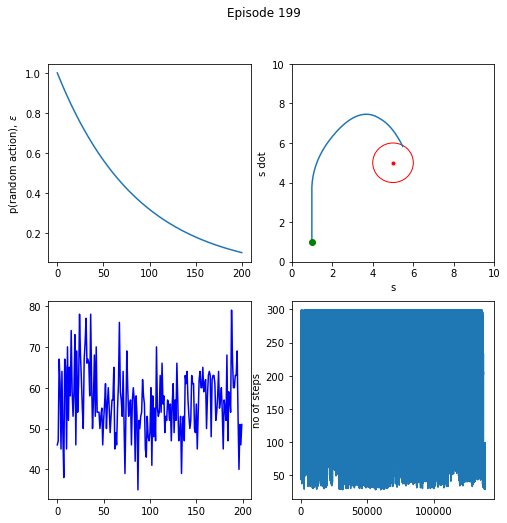

In [499]:
## Parameters`
K =200 
n_actions = 3 
max_steps = 100
gamma = 0.92
verbose = False

epsilon = 1
final_epsilon = 0.1
epsilon_decay =  np.exp(np.log(final_epsilon) / K)

####################
nHiddens = 20
nSamples = 1
nOutputs = 1
nInputs = 4 + 2  # size of state + action
max_iter = 10

rhoh = rhoo = 0.01

rh = rhoh / (nSamples*nOutputs)
ro = rhoo / (nSamples*nOutputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(0,1,size=(nInputs+1,nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(0,1,size=(1+nHiddens,nOutputs))-0.5)


# Add constant column of 1's
def addOnes(A):
    return np.insert(A, 0, 1, axis=len(np.array(A).shape)-1)


def forward(X):
    X = stdX.standardize(X)
    # Forward pass on training data
    X1 = addOnes(X)
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W
    return Y, Z

def as_array(A):
    A = np.array(A)
    if len(A.shape) == 1:
        return A.reshape((1, -1))
    return A

def backward(error, Z, X):
    
    ### make sure the array shapes
    X = as_array(X)
    Z = as_array(Z)
    E = as_array(error)
    
    Z1 = addOnes(Z)
    X1 = addOnes(X)

    # Backward pass - the backpropagation and weight update steps
    dV = rh * X1.T @ ( ( E @ W[1:,:].T) * (1-Z**2))
    dW = ro * Z1.T @ E
    return dV, dW


def epsilon_greedy(e, s):
    pos_a = env.get_actions()
    if np.random.rand() < e:
        return pos_a[np.random.choice(np.arange(len(pos_a)))]
    else:
        Q, _ = forward(np.hstack((np.tile(s, (5,1)), env.get_actions())))
        idx = np.where(Q == np.max(Q))
        max_as = env.get_actions()[idx[0]]
        max_as = max_as[np.random.choice(np.arange(max_as.shape[0]))]
        return max_as
        

fig = plt.figure(figsize=(8, 8))
####################
# Cart model environment 
env = Marble2d()

####################
# Normalize 
stdX = Standardizer(env.get_state_range_real())


# rewards and step trace
rtrace = []
etrace = [epsilon]
errors = []
dv_dq=[]
for j in range(K):

    if verbose: print("\tepisode #", j, "   ",end="")
        
#     start_pos = np.random.rand(1,2)[0]*10
    start_pos = [1,1]
    env.init([*start_pos, 0,0])
    s = env.get_cur_state()
    
    # selection an action
    a = epsilon_greedy(epsilon, s)

    rewards = []
    trace = np.array(s)
    for step in range(max_steps):
        if verbose: print("\tstep #", step, "   ",end="")
        # move
        r1 = env.next(a)
        s1 = env.get_cur_state()
        a1 = epsilon_greedy(epsilon, s1)

        rewards.append(r1)
        trace = np.vstack((trace, s1))
        
        # update neural networks
        Q1, _ = forward(np.hstack((s1, a1)))  # output of neural network is Q for next state
        Q, Z = forward(np.hstack((s, a)))  # output of neural network is Q for next state
        error = r1 + gamma * Q1 - Q  # use action value as index by adding one\
        errors.append(error[0])
        dV, dW = backward(error, Z, np.hstack((s, a)))
        V += dV
        W += dW
        
        dv_dq.append((np.linalg.norm(dV) , np.linalg.norm(dW)))
        s = s1
        a = a1
        eud_now = np.sqrt(np.sum((np.array(s1[:2]) - env.Goal)**2))
        if int(eud_now) <=env.goal_width-1.9:
            steps.append(step)
            break
        
    epsilon *= epsilon_decay
    etrace.append(epsilon)
    
    if verbose: print("Done (", np.sum(rewards), ")", step)

    rtrace.append(np.sum(rewards))

    last_plot = (j == K-1)
    
    if j % 10 == 0 or last_plot:
        plt.clf()
        fig.add_subplot(221)
        plt.plot(etrace, "-")
        plt.ylabel("p(random action), $\epsilon$")
        fig.add_subplot(222)
        env.draw_trajectory(trace)
        fig.add_subplot(223)
        plt.plot(rtrace,"b-")
        fig.add_subplot(224)
        plt.plot(steps)
        plt.ylabel("no of steps")
        plt.suptitle(''.join(["Episode ",str(j)]))
        plt.draw()
        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)

## Analysis-

we tunes these hyper parameters while looking at various factors. The consistency of rewards and no of steps taken to reach the goal. We tweaked with minor changes and found these parameters as  best fit.<br>

We can analyze that increaing learning rate rho slows down the learning process and we need to increase number of max steps for the model to learn better.<br>
For Epsilon, the reward values decreases as we increase the value of epsilon and the lower the value the better the result.<br>
For gamma, we can see that there are slight changes with increase in value of gamma and the best input is taken for training.

## Visualizations

plotting results for the above trianed model

Text(0.5, 0, 'sum of rewards')

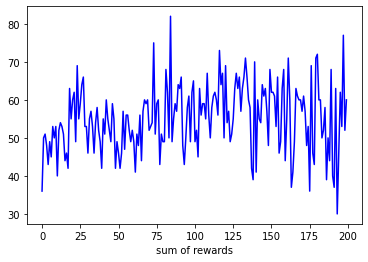

In [386]:
plt.plot(rtrace, "b-")
plt.xlabel("sum of rewards")

## Observations and analysis of learning results and plots

From the above figures we can see that there is gradual increase in rewards as the marble is learning to move in direction of goal. We can also observe that there is random step counts at which the marble reaches the goal. To increase accuracy of the marble reaching goal, we can increase the number of episodes, this will give Q table more time to learn accurately.

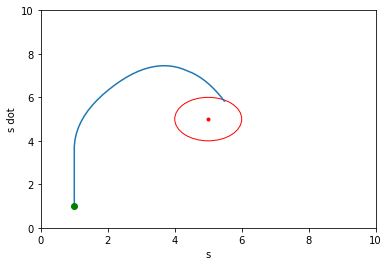

In [500]:
env.draw_trajectory(trace)

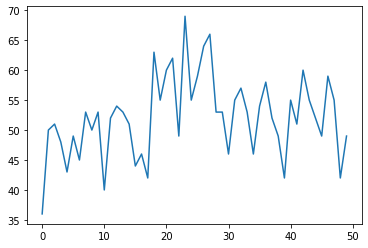

In [490]:
plt.plot(range(50),rtrace[0:50])

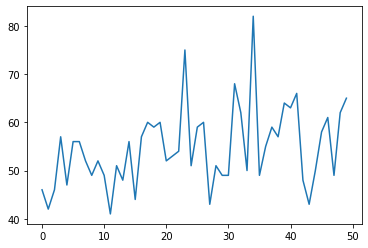

In [383]:
plt.plot(range(50),rtrace[50:100])

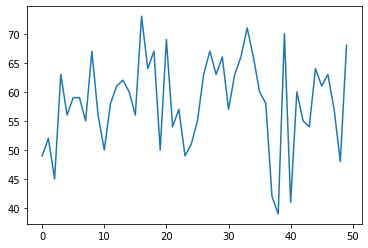

In [384]:
plt.plot(range(50),rtrace[100:150])

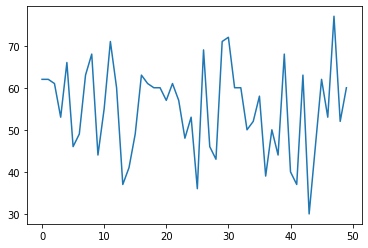

In [385]:
plt.plot(range(50),rtrace[150:200])

Text(0.5, 0, 'Number of steps')

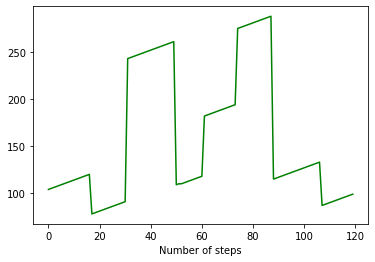

In [496]:
plt.plot(steps[:120], "g-")
plt.xlabel("Number of steps")

### Analysis:

we can observe that there is consistent growth in rewards while looking at them. We can also observe that there is drastic decrease in the number of steps. This shows that model is learning. The model needs more episodes for better learning curve.

## Reports the selected parameters 

### Mountain car:
I have used $\gamma$ gamma as 0.9, $\rho$ rho as 0.8 and $\epsilon$ eplision as heighest for 0.8 and it decays with each iteration and stops at 0.1.

## Experimental outputs that show the choice of parameters:

## 1.  $\rho$ 

In [474]:
rho=[]
reward=[]
for i in range(10):
    rewards,positions = RlAgent2(env1,0.1*i, 0.9, 0.8, 0.1, 100)
    rho.append(round((0.1*i),1))
    reward.append(rewards)

In [475]:
print(rho)
print(reward)
best_rho=rho[reward.index(max(reward))]
print(f"Best value of rho {best_rho}")

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[[-196.0], [-194.0], [-194.0], [-192.0], [-193.0], [-193.0], [-194.0], [-193.0], [-194.0], [-196.0]]
Best value of rho 0.3


## 2.  $\epsilon$ 

In [476]:
epsilon=[]
reward1=[]
for i in range(10):
    rewards,positions = RlAgent2(env1,0.8, 0.9,1.0-(0.1*i) , 1.0-(0.1*i), 100)
    epsilon.append(round((0.1*i),1))
    reward1.append(np.mean(rewards))

In [477]:
print(epsilon)
print(reward1)
best_epsilon=epsilon[reward1.index(max(reward1))]
print(f"Best value of epsilon {best_epsilon}")

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[-196.0, -195.0, -195.0, -195.0, -195.0, -194.0, -196.0, -194.0, -193.0, -194.0]
Best value of epsilon 0.8


## 3.  $\gamma$ 

In [478]:
gamma=[]
reward2=[]
for i in range(10):
    rewards,positions = RlAgent2(env1,0.8, 0.9+(0.01*i),0.8 , 0.1, 100)
    gamma.append(round((0.9+(0.01*i)),2))
    reward2.append(np.mean(rewards))

In [479]:
print(gamma)
print(reward2)
best_gamma=epsilon[reward2.index(max(reward2))]
print(f"Best value of epsilon {best_gamma}")

[0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
[-193.0, -194.0, -193.0, -194.0, -195.0, -195.0, -194.0, -194.0, -194.0, -192.0]
Best value of epsilon 0.9


## Running with best parameters


In [575]:
rewards,positions = RlAgent2(env1,best_rho, best_gamma,best_epsilon , 0.1, 1000)

## Visualizations and observations:

Text(0, 0.5, 'Rewards')

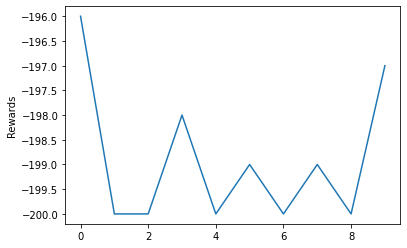

In [576]:
plt.plot(rewards)
plt.ylabel('Rewards')

Text(0, 0.5, 'Furthest Position')

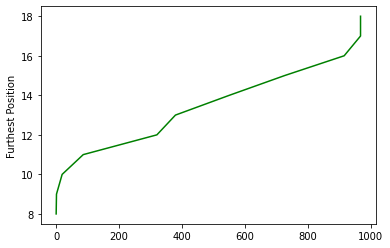

In [577]:
plt.plot(positions[:,0], positions[:,1],'g-')
plt.ylabel('Furthest Position')

## Analysis of learning results and plots

Text(0, 0.5, 'Rewards')

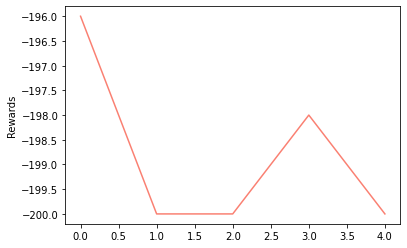

In [580]:
plt.plot(rewards[0:2],'-',color='salmon')
plt.ylabel('Rewards')

Text(0, 0.5, 'Rewards')

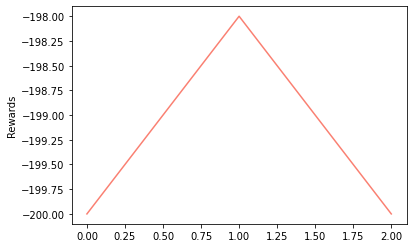

In [592]:
plt.plot(rewards[2:5],'-',color='salmon')
plt.ylabel('Rewards')

Text(0, 0.5, 'Rewards')

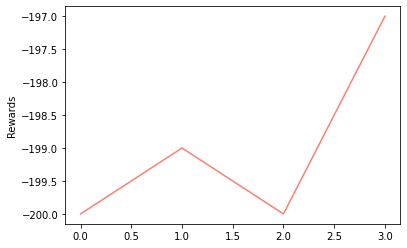

In [590]:
plt.plot(rewards[6:10],'-',color='salmon')
plt.ylabel('Rewards')

Text(0, 0.5, 'Rewards')

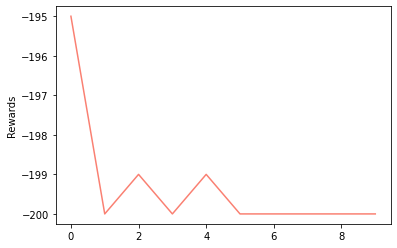

In [571]:
plt.plot(rewards,'-',color='salmon')
plt.ylabel('Rewards')

Text(0, 0.5, 'Furthest Position')

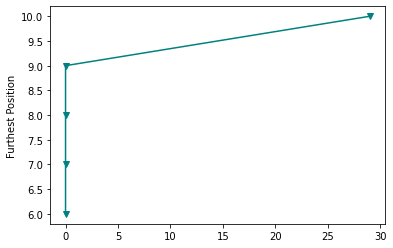

In [572]:
plt.plot(positions[:5,0],positions[:5,1],'v-',color='teal')
plt.ylabel('Furthest Position')

Text(0, 0.5, 'Furthest Position')

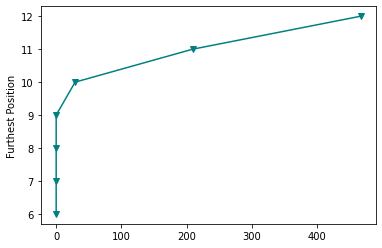

In [573]:
plt.plot(positions[:10,0],positions[:10,1],'v-',color='teal')
plt.ylabel('Furthest Position')

Text(0, 0.5, 'Furthest Position')

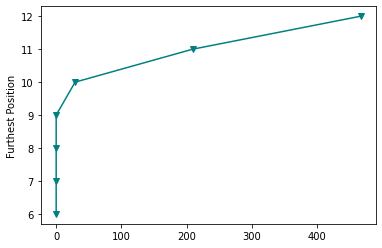

In [574]:
plt.plot(positions[:12,0],positions[:12,1],'v-',color='teal')
plt.ylabel('Furthest Position')

Text(0.5, 0, 'Furthest Position')

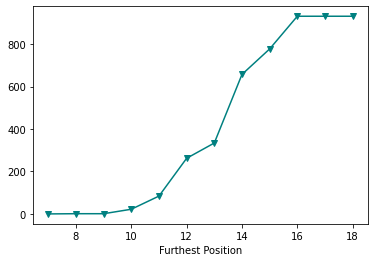

In [561]:
plt.plot(positions[:18,1],positions[:18,0],'v-',color='teal')
plt.xlabel('Furthest Position')

Thus from the above figures we can observe that though reward value remain constant. The car is exploring area with each move and reaching to the highest point at the end of 1000 episodes. The model has learnt that on right side the highest poiint is goal and tried to move in that direction.

# V. Conclusions

I learnt how Reinforcement Learning works and how to implement a reward system for the card game rummy. I also learnt how the states and environments work. I learnt the difference between Q-learning and SARSA and how the Q-tables are updated for the policies. I have visualized and explained the outputs.